# Warming Arctic and associated change in DMS emission.

## By Rahul Ranjan (Assistant: Ada Gjermundsen)

## Abstract

## 1. Introduction

## 2. Data

## 3.Methods

### 3.1 Import pakages

In [2]:
import modules as md 
import xarray as xr
import cftime
import numpy as np
import s3fs
import warnings
import intake
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%load_ext autoreload
%autoreload 2
warnings.simplefilter('ignore')
xr.set_options(display_style='html')
%matplotlib inline 
model= 'NorESM2-LM'  #name of the model, other option that can be put are  CNRM-ESM2-1, CESM2

### 3.2 Calculation of yearly trends for the Arctic region

In [4]:
#.................Chlorophyll..................#
model= 'NorESM2-LM'
var='chlos'
chlos=md.regional_average(model,var)  

y=chlos.to_numpy()
x=chlos.year
xx=x.to_numpy()
chlos=[xx,y]

np.savetxt('Data/timeseries/chlos.txt',np.array(chlos))

#...................SST...........................#
var='tos'
tos=md.regional_average(model,var)

y=tos.to_numpy()
x=tos.year
xx=x.to_numpy()
tos=[xx,y]

np.savetxt('Data/timeseries/tos.txt',np.array(tos))

#.....................DMS...........................#
model= 'NorESM2-LM'
var='dmsos'
dmsos=md.regional_average(model,var)

y=dmsos.to_numpy()
x=dmsos.year
xx=x.to_numpy()

dmsos=[xx,y]
np.savetxt('Data/timeseries/dmsos.txt',np.array(dmsos))

#.......................Sea Ice............................#
model= 'NorESM2-LM'  
var='siconc'
siconc=md.regional_average(model,var)

y=siconc.to_numpy()
x=siconc.year
xx=x.to_numpy()

siconc=[xx,y]
np.savetxt('Data/timeseries/siconc.txt',np.array(siconc))


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


### 3.3 Anomaly for different seasons

In [3]:
"Anomaly in chlorophyll mass concentration"
ds_now=md.anomaly_seasonal(model,'chlos')[0] #calculates the average for the years 1980-2014
ds_ref=md.anomaly_seasonal(model,'chlos')[1] #calculates the climatology
anm=ds_now-ds_ref  #calculation of anomaly

### 3.4 Calculation of trends

In [4]:
ds_ls=md.seasonal_avg_timeseries(model,'chlos') #trend calculation for chlorophyll for different seasons


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


## 4. Results

### 4.1 Yearly Trends

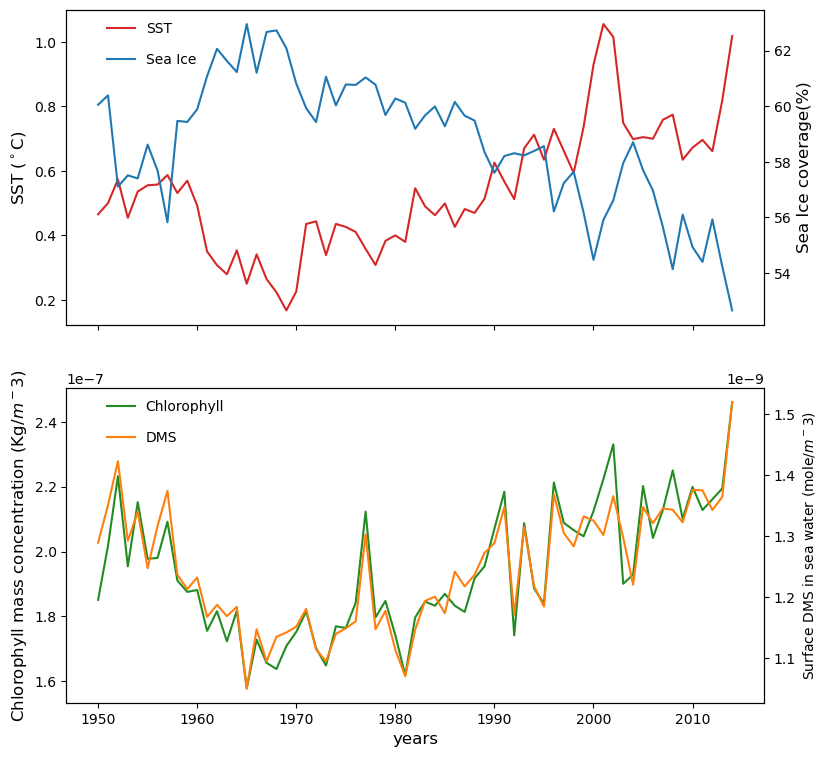

In [53]:
##.............................plot trends for the last 'n' years.............................##

n=65
chlos= np.loadtxt('Data/timeseries/chlos.txt')
dmsos= np.loadtxt('Data/timeseries/dmsos.txt')
siconc= np.loadtxt('Data/timeseries/siconc.txt')
tos= np.loadtxt('Data/timeseries/tos.txt')

fig,(ax1,ax2)=plt.subplots(2,sharex=True, figsize=(9, 9))

ax1.plot(tos[0][-n:],tos[1][-n:],label='SST',color='tab:red')
ax11=ax1.twinx()
ax11.plot(siconc[0][-n:],siconc[1][-n:],label='Sea Ice',color='tab:blue')
ax1.set_ylabel('SST ($^\circ$C)',fontsize=12)
ax11.set_ylabel('Sea Ice coverage(%)',fontsize=12)



ax2.plot(chlos[0][-n:],chlos[1][-n:],label='Chlorophyll',color='forestgreen')
ax22=ax2.twinx()
ax22.plot(dmsos[0][-n:],dmsos[1][-n:],label='DMS',color='tab:orange')
ax2.set_ylabel('Chlorophyll mass concentration (Kg/$m^-3$)',fontsize=12)
ax22.set_ylabel('Surface DMS in sea water (mole/$m^-3$)')
ax2.set_xlabel('years',fontsize=12)

ax1.legend(loc=(0.05,0.9),frameon=False)
ax11.legend(loc=(0.05,0.8),frameon=False)
ax2.legend(loc=(0.05,0.9),frameon=False)
ax22.legend(loc=(0.05,0.8),frameon=False)

## 4.2 Anomalies in different seasons

### 4.2.1. SST and Sea Ice

In [8]:
##............................SST..........................##
dsst_now=md.anomaly_seasonal(model,'tos')[0]
dsst_ref=md.anomaly_seasonal(model,'tos')[1]

In [9]:
##.....................Sea Ice coverage......................##
ds_ice_now=md.anomaly_seasonal(model,'siconc')[0]
ds_ice_ref=md.anomaly_seasonal(model,'siconc')[1]

In [10]:
##.....................Anomaly calculation......................##
anm_sst=dsst_now-dsst_ref #SST
anm_ice=ds_ice_now-ds_ice_ref #Sea Ice

Text(0.48, 0.71, 'SST change')

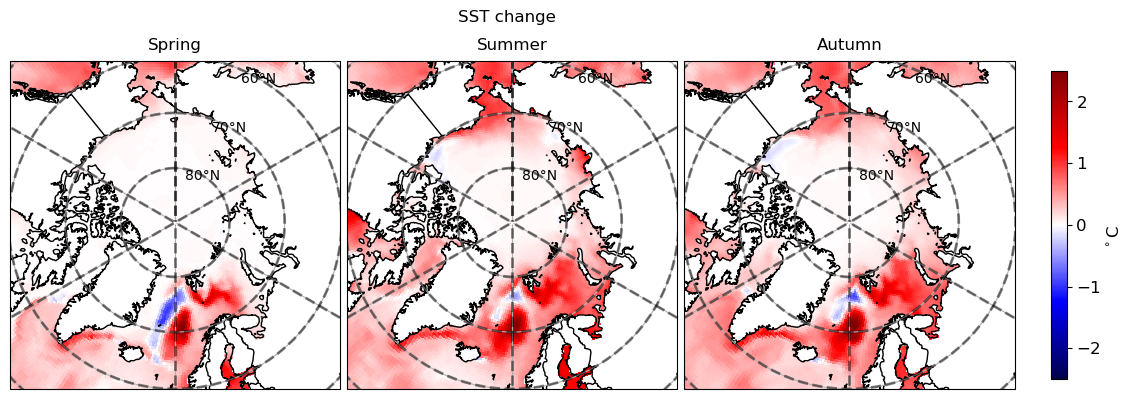

In [20]:
fig, axs = plt.subplots(1, 3,figsize=(14, 10),subplot_kw={'projection': ccrs.NorthPolarStereo()})

titles=['Spring','Summer','Autumn']
seasons=['MAM','JJA','SON']

for i in range (len(axs.flat)):
    cs=anm_sst.tos.sel(season=seasons[i]).plot(ax=axs.flat[i],x='longitude',y='latitude'
                                 ,transform=ccrs.PlateCarree(), cmap='seismic',add_colorbar=False)
    axs.flat[i].set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
    axs.flat[i].add_feature(cfeature.BORDERS)
    axs.flat[i].add_feature(cfeature.COASTLINE)
    axs.flat[i].gridlines()
    axs.flat[i].set_title(titles[i],pad=8,fontsize=12)
    gl = axs.flat[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='k', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.xlabels_bottom= False

# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(wspace=0.02,right=1)
cbar=plt.colorbar(cs, ax=axs, shrink=0.4, location='right',pad=0.03)
cbar.ax.tick_params(labelsize=12)

cbar.set_label('$^\circ$C',horizontalalignment='right',fontsize=12)
fig.suptitle('SST change',y=0.71,x=0.48)
#plt.savefig('plots/anomaly/SST.png',dpi=500)

Text(0.5, 0.71, 'change in sea ice area')

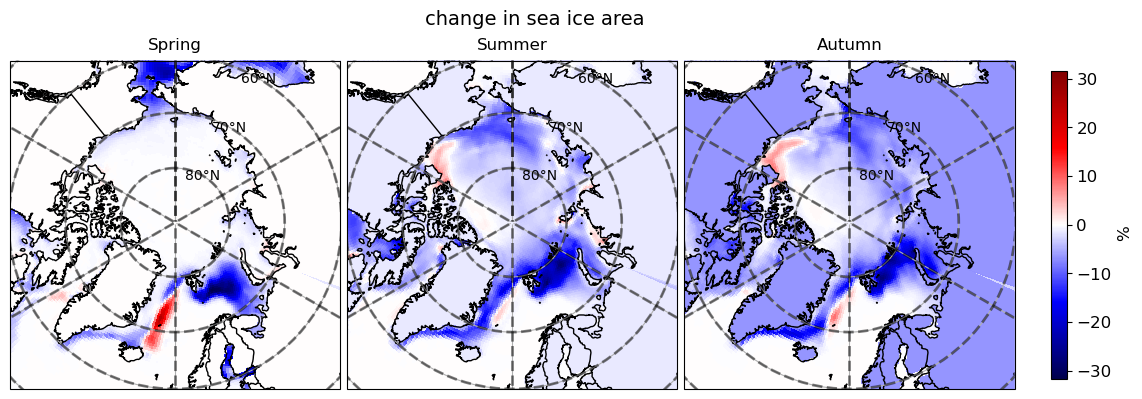

In [13]:
fig, axs = plt.subplots(1, 3,figsize=(14, 10),subplot_kw={'projection': ccrs.NorthPolarStereo()})

titles=['Spring','Summer','Autumn']
seasons=['MAM','JJA','SON']

for i in range (len(axs.flat)):
    cs=anm_ice.siconc.sel(season=seasons[i]).plot(ax=axs.flat[i],x='longitude',y='latitude'
                                 ,transform=ccrs.PlateCarree(), cmap='seismic',add_colorbar=False)
    axs.flat[i].set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
    #axs.flat[i].stock_img()
    axs.flat[i].add_feature(cfeature.BORDERS)
    axs.flat[i].add_feature(cfeature.COASTLINE)
    axs.flat[i].gridlines()
    axs.flat[i].set_title(titles[i],pad=8,fontsize=12)
    gl = axs.flat[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='k', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.xlabels_bottom= False

# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(wspace=0.02,right=1)
cbar=plt.colorbar(cs, ax=axs, shrink=0.4, location='right',pad=0.03)
cbar.ax.tick_params(labelsize=12)

cbar.set_label('%',horizontalalignment='right',fontsize=12)
fig.suptitle('change in sea ice area',y=0.71,fontsize=14)
#plt.savefig('plots/anomaly/sea_ice.png',dpi=500)

The warming sea has influenced sea ice significantly over the Barent sea region which has now lost 10-20% of the sea ice. There is a rise in the sea ice cover over the cooling spot between the Norwegin sea and the Greenland sea, which is more pronounced in the spring. Greenland sea has lost more ice during the summer and Autumn while almost no change in the spring. The effect of global warming has reached upto the central arctic too, but bigger differnces in sea ice and SST are observed mostly in the lower latitude.

### 4.2.2. chlorophyll and DMS

In [14]:
##............................Chlorophyll..........................##
ds_chlos_now=md.anomaly_seasonal(model,'chlos')[0]
ds_chlos_ref=md.anomaly_seasonal(model,'chlos')[1]
anm_chlos=ds_chlos_now-ds_chlos_ref  #anomaly chlorophyll

In [16]:
##............................DMS..........................##
ds_DMS_now=md.anomaly_seasonal(model,'dmsos')[0]
ds_DMS_ref=md.anomaly_seasonal(model,'dmsos')[1]
anm_DMS=ds_DMS_now-ds_DMS_ref #anomaly DMS

Text(0.5, 0.71, 'Chlorophyll mass concentration')

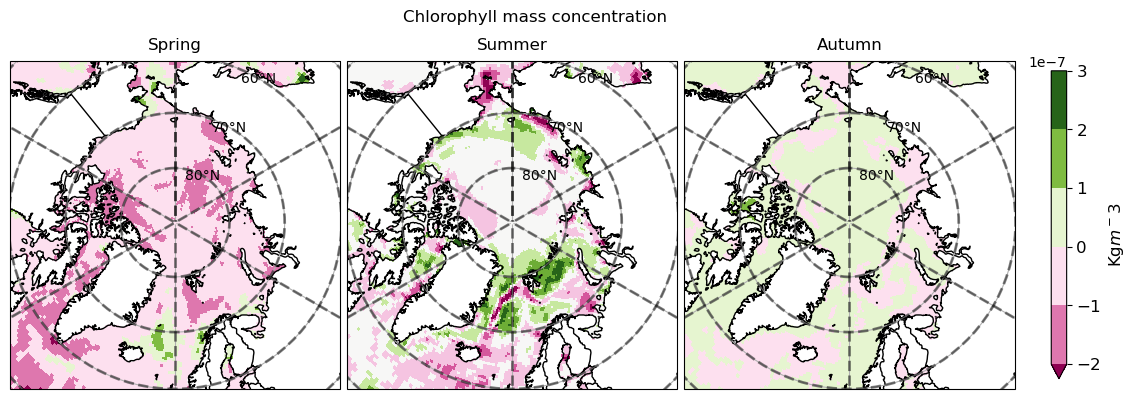

In [33]:
fig, axs = plt.subplots(1, 3,figsize=(14, 10),subplot_kw={'projection': ccrs.NorthPolarStereo()})

titles=['Spring','Summer','Autumn']
seasons=['MAM','JJA','SON']

for i in range (len(axs.flat)):
    cs=anm_chlos.chlos.sel(season=seasons[i]).plot(ax=axs.flat[i],x='longitude',y='latitude'
                                 ,transform=ccrs.PlateCarree(), cmap='PiYG',levels = np.linspace(-2e-7,3e-7,6),add_colorbar=False)
    axs.flat[i].set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
    #axs.flat[i].stock_img()
    axs.flat[i].add_feature(cfeature.BORDERS)
    axs.flat[i].add_feature(cfeature.COASTLINE)
    axs.flat[i].gridlines()
    axs.flat[i].set_title(titles[i],pad=8,fontsize=12)
    gl = axs.flat[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='k', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.xlabels_bottom= False


#ticks=np.arange(-2e-7,+3.5e-7,1e-7)
# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(wspace=0.02,right=1)
cbar=plt.colorbar(cs, ax=axs,shrink=0.4, location='right',pad=0.03)
#cbar.ax.locator_params(nbins=5)
cbar.ax.tick_params(labelsize=12)

cbar.set_label('Kg$m^-3$',horizontalalignment='right',fontsize=12,y=0.55)
fig.suptitle('Chlorophyll mass concentration',y=0.71)

#plt.savefig('plots/anomaly/chlos.png',dpi=500)

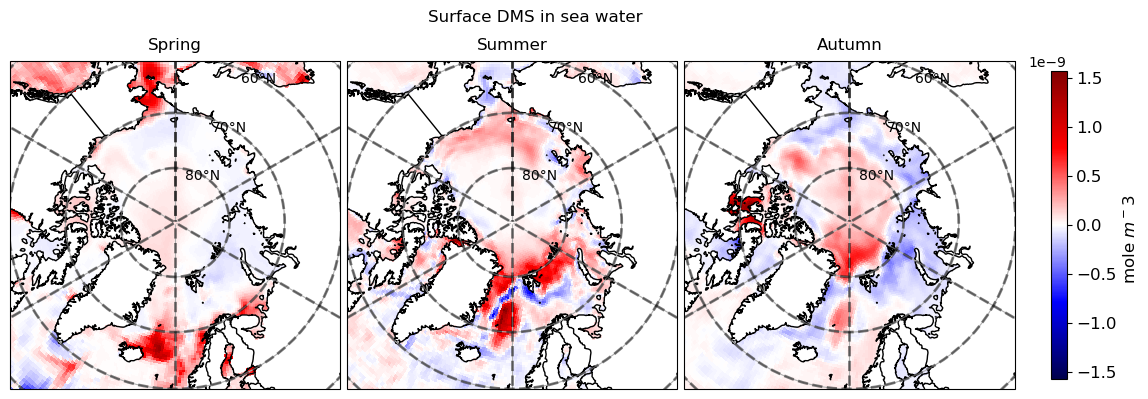

In [34]:
fig, axs = plt.subplots(1, 3,figsize=(14, 10),subplot_kw={'projection': ccrs.NorthPolarStereo()})

titles=['Spring','Summer','Autumn']
seasons=['MAM','JJA','SON']

for i in range (len(axs.flat)):
    cs=anm_DMS.dmsos.sel(season=seasons[i]).plot(ax=axs.flat[i],x='longitude',y='latitude'
                                 ,transform=ccrs.PlateCarree(), cmap='seismic',add_colorbar=False)
    axs.flat[i].set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
    #axs.flat[i].stock_img()
    axs.flat[i].add_feature(cfeature.BORDERS)
    axs.flat[i].add_feature(cfeature.COASTLINE)
    axs.flat[i].gridlines()
    axs.flat[i].set_title(titles[i],pad=8,fontsize=12)
    gl = axs.flat[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='k', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.xlabels_bottom= False

# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(wspace=0.02,right=1)
cbar=plt.colorbar(cs, ax=axs, shrink=0.4, location='right',pad=0.03)
cbar.ax.tick_params(labelsize=12)

cbar.set_label('mole $m^-3$',horizontalalignment='right',fontsize=12,y=0.6)
fig.suptitle('Surface DMS in sea water',y=0.71)

plt.savefig('plots/anomaly/DMS.png',dpi=500)
#levels = np.linspace(-2e-7,3e-7,6)

## 4.3. Trends in the Arctic in different seasons

### 4.3.1 Chlorophyll and DMS

In [ ]:
##....................Chlorophyll....................##
ds_ls=md.seasonal_avg_timeseries(model,'chlos')

ds_spring=md.slice_assign(ds_ls[1])
ds_summer=md.slice_assign(ds_ls[2])
ds_autumn=md.slice_assign(ds_ls[3])

ds_chlos=[ds_spring,ds_summer,ds_autumn]


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [22]:
##..................DMS.............................##
dms_ls=md.seasonal_avg_timeseries(model,'dmsos')

dms_spring=md.slice_assign(dms_ls[1])
dms_summer=md.slice_assign(dms_ls[2])
dms_autumn=md.slice_assign(dms_ls[3])

dms=[dms_spring,dms_summer,dms_autumn]


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


Text(0.48, 0.71, 'Chlorophyll')

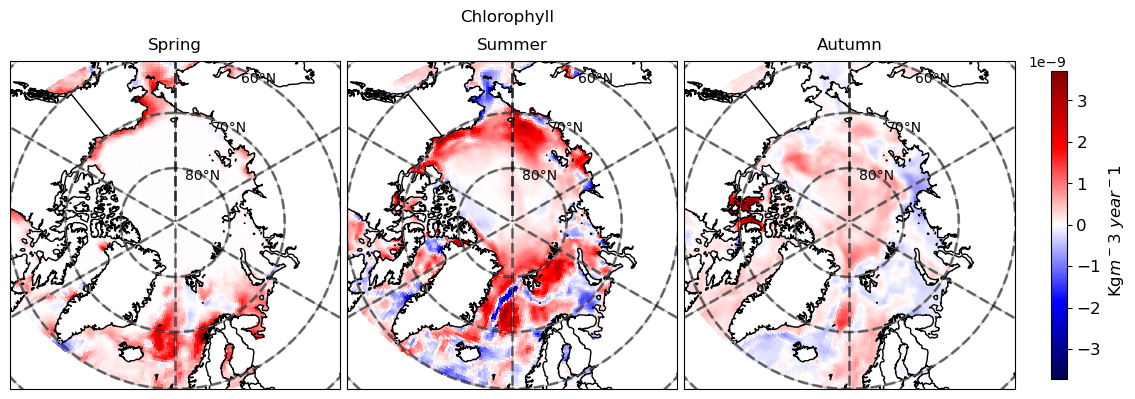

In [121]:
fig, axs = plt.subplots(1, 3,figsize=(14, 10),subplot_kw={'projection': ccrs.NorthPolarStereo()})

titles=['Spring','Summer','Autumn']

for i in range (len(axs.flat)):
    cs=ds[i].chlos_polyfit_coefficients[0].plot(ax=axs.flat[i],x='longitude',y='latitude'
                                 ,transform=ccrs.PlateCarree(), cmap='seismic',add_colorbar=False)
    
    axs.flat[i].set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
    axs.flat[i].add_feature(cfeature.BORDERS)
    axs.flat[i].add_feature(cfeature.COASTLINE)
    axs.flat[i].gridlines()
    axs.flat[i].set_title(titles[i],pad=8,fontsize=12)
    gl = axs.flat[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='k', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.xlabels_bottom= False


# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(wspace=0.02,right=1)
cbar=plt.colorbar(cs, ax=axs, shrink=0.4, location='right',pad=0.03)
cbar.ax.tick_params(labelsize=12)

cbar.set_label('Kg$m^-3$ $year^-1$',horizontalalignment='right',fontsize=12,y=0.7)
fig.suptitle('Chlorophyll',y=0.71,x=0.48)

plt.savefig('plots/Trend/SST.png',dpi=500)

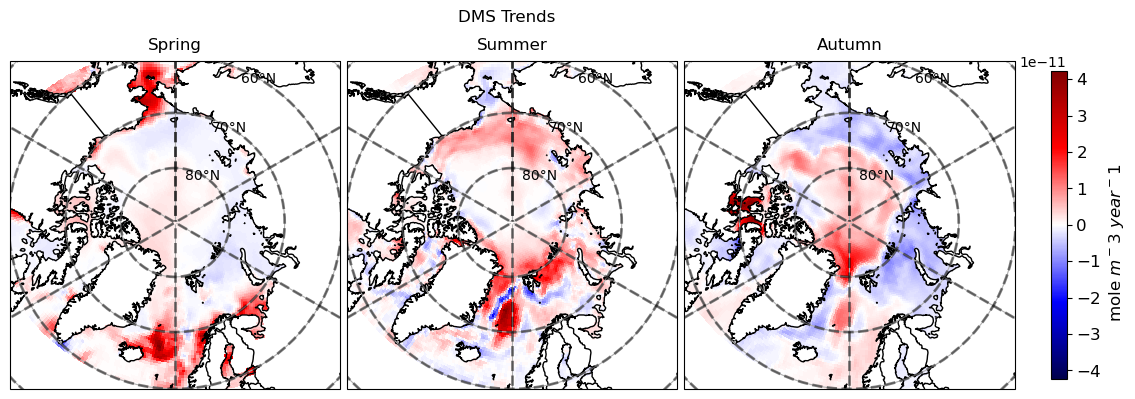

In [145]:
fig, axs = plt.subplots(1, 3,figsize=(14, 10),subplot_kw={'projection': ccrs.NorthPolarStereo()})

titles=['Spring','Summer','Autumn']

for i in range (len(axs.flat)):
    cs=dms[i].dmsos_polyfit_coefficients[0].plot(ax=axs.flat[i],x='longitude',y='latitude'
                                 ,transform=ccrs.PlateCarree(), cmap='seismic',add_colorbar=False)
    
    axs.flat[i].set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
    axs.flat[i].add_feature(cfeature.BORDERS)
    axs.flat[i].add_feature(cfeature.COASTLINE)
    axs.flat[i].gridlines()
    axs.flat[i].set_title(titles[i],pad=8,fontsize=12)
    gl = axs.flat[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='k', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.xlabels_bottom= False


# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(wspace=0.02,right=1)
cbar=plt.colorbar(cs, ax=axs, shrink=0.4, location='right',pad=0.03)
cbar.ax.tick_params(labelsize=12)

cbar.set_label('mole $m^-3$ $year^-1$',horizontalalignment='right',fontsize=12,y=0.7)
fig.suptitle('DMS Trends',y=0.71,x=0.48)

plt.savefig('plots/Trend/DMS.png',dpi=500)

### 4.3.2 SST and Sea ice

In [23]:
dsst_ls=md.seasonal_avg_timeseries(model,'tos')

dsst_spring=md.slice_assign(dsst_ls[1])
dsst_summer=md.slice_assign(dsst_ls[2])
dsst_autumn=md.slice_assign(dsst_ls[3])

dsst=[dsst_spring,dsst_summer,dsst_autumn]


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [28]:
dice_ls=md.seasonal_avg_timeseries(model,'siconc')
dice_spring=md.slice_assign(dice_ls[1])
dice_summer=md.slice_assign(dice_ls[2])
dice_autumn=md.slice_assign(dice_ls[3])

dice=[dice_spring,dice_summer,dice_autumn]

Text(0.48, 0.71, 'SST')

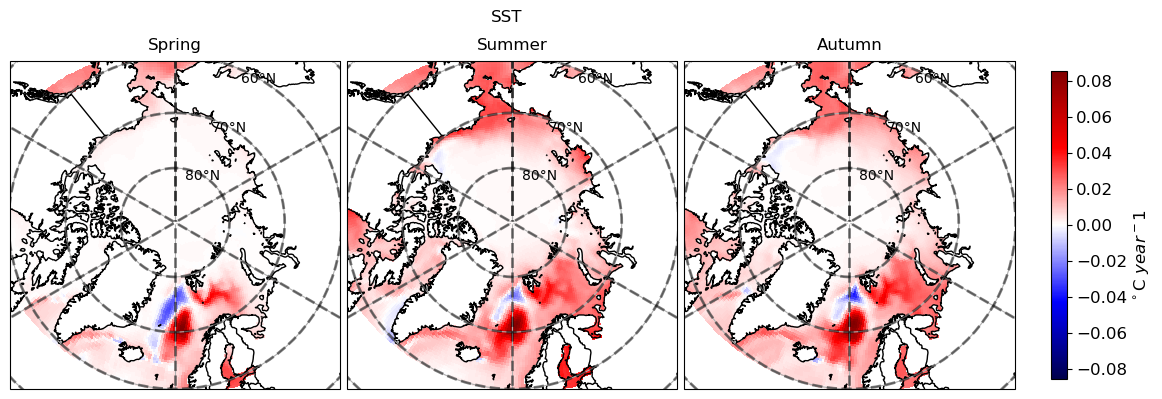

In [38]:
fig, axs = plt.subplots(1, 3,figsize=(14, 10),subplot_kw={'projection': ccrs.NorthPolarStereo()})

titles=['Spring','Summer','Autumn']

for i in range (len(axs.flat)):
    cs=dsst[i].tos_polyfit_coefficients[0].plot(ax=axs.flat[i],x='longitude',y='latitude'
                                 ,transform=ccrs.PlateCarree(), cmap='seismic',add_colorbar=False)
    
    axs.flat[i].set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
    axs.flat[i].add_feature(cfeature.BORDERS)
    axs.flat[i].add_feature(cfeature.COASTLINE)
    axs.flat[i].gridlines()
    axs.flat[i].set_title(titles[i],pad=8,fontsize=12)
    gl = axs.flat[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='k', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.xlabels_bottom= False


# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(wspace=0.02,right=1)
cbar=plt.colorbar(cs, ax=axs, shrink=0.4, location='right',pad=0.03)
cbar.ax.tick_params(labelsize=12)

cbar.set_label(' $^\circ$C $year^-1$',horizontalalignment='right',fontsize=12,y=0.55)
fig.suptitle('SST',y=0.71,x=0.48)

Text(0.48, 0.71, 'Sea Ice Trends')

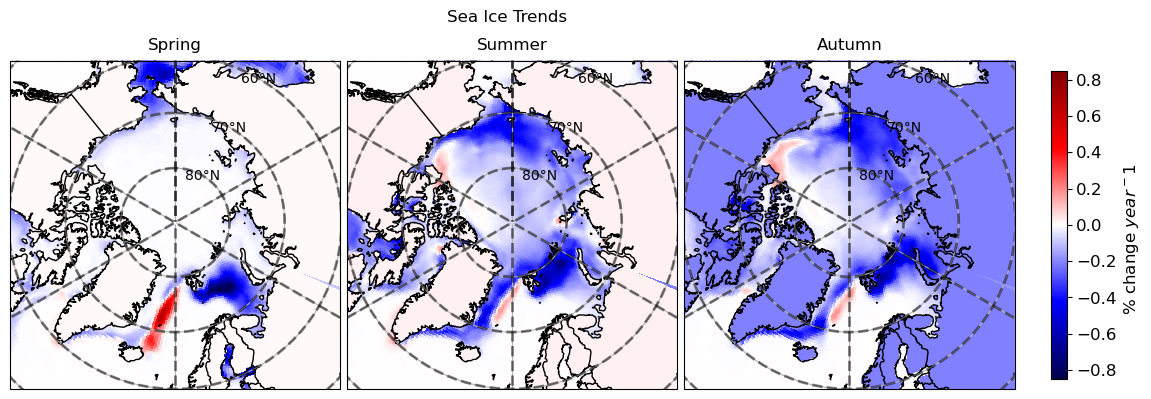

In [39]:
fig, axs = plt.subplots(1, 3,figsize=(14, 10),subplot_kw={'projection': ccrs.NorthPolarStereo()})

titles=['Spring','Summer','Autumn']
seasons=['MAM','JJA','SON']

for i in range (len(axs.flat)):
    cs=dice[i].siconc_polyfit_coefficients[0].plot(ax=axs.flat[i],x='longitude',y='latitude'
                                 ,transform=ccrs.PlateCarree(), cmap='seismic',add_colorbar=False)
    
    axs.flat[i].set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
    axs.flat[i].add_feature(cfeature.BORDERS)
    axs.flat[i].add_feature(cfeature.COASTLINE)
    axs.flat[i].gridlines()
    axs.flat[i].set_title(titles[i],pad=8,fontsize=12)
    gl = axs.flat[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='k', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.xlabels_bottom= False


# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(wspace=0.02,right=1)
cbar=plt.colorbar(cs, ax=axs, shrink=0.4, location='right',pad=0.03)
cbar.ax.tick_params(labelsize=12)

cbar.set_label('% change $year^-1$',horizontalalignment='right',fontsize=12,y=0.7)
fig.suptitle('Sea Ice Trends',y=0.71,x=0.48)

# 5. Conclusion

# References

Isaksen, K., Nordli, Ø., Ivanov, B. et al. Exceptional warming over the Barents area. Sci Rep 12, 9371 (2022). https://doi.org/10.1038/s41598-022-13568-5

Muller-Karger, Frank & Varela, Ramón & Thunell, Robert & Luerssen, R. & Hu, C. & Walsh, John. (2005). The important of continental margins in the global carbon cycle. Geophysical Research Letters. 32. 10.1029/2004GL021346.

Rantanen, M., Karpechko, A.Y., Lipponen, A. et al. The Arctic has warmed nearly four times faster than the globe since 1979. Commun Earth Environ 3, 168 (2022). https://doi.org/10.1038/s43247-022-00498-3

# Acknowledgent

The entire courese has been a nice learning experience for me. Specially, I got a chance to refine my python coding skills and got more familiar with data analysis and plotting tools. Ada has been an amazing guide and she helped me a lot in learning the coding techniques and ways to reduce time in calculations. She was super quick in providing all types of Data required for the study. I would also like to thank Paul and Michael for giving me an opportunity to participate in the course.

# Supplementry Material

In [41]:
import xarray as xr
import intake
import cftime
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import s3fs
import glob
#%matplotlib inline

#......use 'volcello' for DMS and clos data......##

def open_file(model,var):
    
    s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", 
                       secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", client_kwargs=dict(endpoint_url="https://rgw.met.no"))

    if model=='NorESM2-LM':
        if var == 'chlos':
            file_dir ='s3://escience2022/Ada/monthly/chlos_Omon_NorESM2-LM_historical_r1i1p1f1_gn_*.nc'
        elif var=='dmsos':
            file_dir ='s3://escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_historical_r1i1p1f1_gn_*.nc'
        elif var=='emidms':
            file_dir ='s3://escience2022/Ada/monthly/emidms_AERmon_NorESM2-LM_historical_r1i1p1f1_gn_*.nc'
        elif var == 'siconc':
            file_dir='s3://escience2022/Ada/monthly/siconc_SImon_NorESM2-LM_historical_r1i1p1f1_gn_*.nc'
        elif var == 'tos':
            file_dir='s3://escience2022/Ada/monthly/tos_Omon_NorESM2-LM_historical_r1i1p1f1_gn_*.nc'
        
    if (model=='CNRM-ESM2-1'):
        
        if var == 'chlos':
            file_dir ='s3://escience2022/Ada/monthly/chlos_Omon_CNRM-ESM2-1_historical_r2i1p1f2_gn*.nc'
        elif var=='dmsos':
            file_dir ='s3://escience2022/Ada/monthly/dmsos_Omon_CNRM-ESM2-1_historical_r2i1p1f2_gn*.nc'
        elif var=='emidms':
            file_dir ='s3://escience2022/Ada/monthly/emidms_AERmon_NorESM2-LM_historical_r1i1p1f1_gn_*.nc'
        elif var == 'siconc':
            file_dir='s3://escience2022/Ada/monthly/siconc_SImon_CNRM-ESM2-1_historical_r2i1p1f2_gn*.nc'
        elif var == 'tos':
            file_dir='s3://escience2022/Ada/monthly/tos_Omon_CNRM-ESM2-1_historical_r2i1p1f2_gn*.nc'
        
    
    if (model=='CESM2'):
        
        if var == 'chlos':
            file_dir ='s3://escience2022/Ada/monthly/chlos_Omon_CESM2_historical_r4i1p1f1_gn*.nc'
        elif var=='dmsos':
            file_dir ='s3://escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_historical_r1i1p1f1_gn*.nc'
        elif var=='emidms':
            file_dir ='s3://escience2022/Ada/monthly/emidms_AERmon_NorESM2-LM_historical_r1i1p1f1_gn*.nc'
        elif var == 'siconc':
            file_dir='s3://escience2022/Ada/monthly/siconc_SImon_CESM2_historical_r4i1p1f1_gn*.nc'
        elif var == 'tos':
            file_dir='s3://escience2022/Ada/monthly/tos_Omon_CESM2_historical_r4i1p1f1_gn*.nc'
        
    remote_files = s3.glob(file_dir)
    fileset = [s3.open(file) for file in remote_files]
    return fileset

def get_areacello(model,region):
    
    min_lat= region[0]
    max_lat= region[1]
    min_lon= region[2]
    max_lon= region[3] 
    
    if (model=='NorESM2-LM'):
        cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
        col = intake.open_esm_datastore(cat_url)
        cat = col.search(source_id=[model], activity_id = ['CMIP'], experiment_id=['piControl'], 
                         table_id=['Ofx'], variable_id=['areacello'], member_id=['r1i1p1f1'])
        ds_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True})
    
        areacello = ds_dict[list(ds_dict.keys())[0]]
        areacello = areacello.squeeze()                     
        
        BSarea = areacello.areacello.where((areacello.latitude>=min_lat) & (areacello.latitude<=max_lat) 
                                       & (areacello.longitude <= max_lon)  & (areacello.longitude >= min_lon))    
    if (model=='CNRM-ESM2-1'):
        cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
        col = intake.open_esm_datastore(cat_url)
        cat = col.search(source_id=[model], activity_id = ['CMIP'], experiment_id=['piControl'], 
                         table_id=['Ofx'], variable_id=['areacello'], member_id=['r2i1p1f2'])
        ds_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True})
    
        areacello = ds_dict[list(ds_dict.keys())[0]]
        areacello = areacello.squeeze()
        
        BSarea = areacello.areacello.where((areacello.lat>=min_lat) & (areacello.lat<=max_lat) 
                                       & (areacello.lon <= max_lon)  & (areacello.lon >= min_lon))
    if (model=='CESM2'):
        cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
        col = intake.open_esm_datastore(cat_url)
        cat = col.search(source_id=[model], activity_id = ['CMIP'], experiment_id=['piControl'], 
                         table_id=['Ofx'], variable_id=['areacello'], member_id=['r4i1p1f1'])
        ds_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True})
    
        areacello = ds_dict[list(ds_dict.keys())[0]]
        areacello = areacello.squeeze()
        
        BSarea = areacello.areacello.where((areacello.lat>=min_lat) & (areacello.lat<=max_lat) 
                                       & (areacello.lon <= max_lon)  & (areacello.lon >= min_lon))
    return BSarea

def get_polar_region(ds,model):  #get an xarray only for the polar region
    
    cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
    col = intake.open_esm_datastore(cat_url)
    
    if (model=='NorESM2-LM'):
        cat = col.search(source_id=['NorESM2-LM'], activity_id = ['CMIP'], experiment_id=['piControl'], 
                     table_id=['Ofx'], variable_id=['areacello'], member_id=['r1i1p1f1'])
    if (model=='CNRM-ESM2-1'):
        cat = col.search(source_id=[model], activity_id = ['CMIP'], experiment_id=['piControl'], 
                         table_id=['Ofx'], variable_id=[area], member_id=['r2i1p1f2'])
        
    if (model=='CESM2'):
        cat = col.search(source_id=[model], activity_id = ['CMIP'], experiment_id=['piControl'], 
                         table_id=['Ofx'], variable_id=[area], member_id=['r4i1p1f1'])
    
    ds_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True})
    areacello = ds_dict[list(ds_dict.keys())[0]]
    areacello = areacello.squeeze()
    areacello = areacello.where(areacello.latitude>60, drop = True)
    da=ds.sel(i=areacello.i).sel(j=areacello.j)
    
    return da
    

def regional_average(model,var):
    
    #calculate the regional average for each year
    min_lat=60
    max_lat=90
    min_lon=0
    max_lon=360
    
    region=[min_lat,max_lat,min_lon,max_lon]  #region defined                                          
    
    cell_area=get_areacello(model,region)  #get cell area
    
    fileset=open_file(model,var)                                               #get a list of files to open
    da = xr.open_mfdataset(fileset, combine='by_coords')
    
    if var!='siconc':
        ds= get_polar_region(da,model)
    else:
        ds=da
    
    dss=weighted_yearly_mean(ds, var)
    
    if (model=='NorESM2-LM'):
        BSsst = dss.where((dss.latitude>=min_lat) & (dss.latitude<=max_lat) & 
                      (dss.longitude <= max_lon)  & (dss.longitude >=min_lon))
    
    if (model=='CNRM-ESM2-1'):
        BSsst = dss.where((dss.lat>=min_lat) & (dss.lat<=max_lat) & 
                      (dss.lon <= max_lon)  & (dss.lon>=min_lon))
        
    if (model=='CESM2'):
        BSsst = dss.where((dss.lat>=min_lat) & (dss.lat<=max_lat) & 
                      (dss.lon <= max_lon)  & (dss.lon >=min_lon))
    
    if var =='chlos':
       BSsst = (cell_area*10*BSsst).sum(dim=('i','j'))/(cell_area*10).sum(dim=('i','j'))  #check if it is correct?
    if var =='dmsos':
       BSsst = (cell_area*10*BSsst).sum(dim=('i','j'))/(cell_area*10).sum(dim=('i','j'))  #check if it is correct?
    else:
        BSsst = (cell_area*BSsst).sum(dim=('i','j'))/(cell_area).sum(dim=('i','j'))
    return BSsst

def weighted_yearly_mean(ds, var):
    """
    weight by days in each month
    """
    # Determine the month length
    month_length = ds.time.dt.days_in_month

    # Calculate the weights
    wgts = month_length.groupby("time.year") / month_length.groupby("time.year").sum()

    # Make sure the weights in each year add up to 1
    np.testing.assert_allclose(wgts.groupby("time.year").sum(xr.ALL_DIMS), 1.0)
     
    # Subset our dataset for our variable
    obs = ds[var]

    # Setup our masking for nan values
    cond = obs.isnull()
    ones = xr.where(cond, 0, 1.0)

    # Calculate the numerator
    obs_sum = (obs * wgts).groupby("time.year").sum(dim="time")

    # Calculate the denominator
    ones_out = (ones*wgts).groupby("time.year").sum(dim="time")

    # Return the weighted average
    return obs_sum / ones_out


def weighted_seasonal_mean(ds,var):  #to calculate mean of a particular season. The output is the mean of each season separately over a period of time.
    
    """
    weight by days in each month
    """
    # Determine the month length
    month_length = ds.time.dt.days_in_month

    # Calculate the weights
    wgts = month_length.groupby("time.season") / month_length.groupby("time.season").sum()

    # Make sure the weights in each year add up to 1
    np.testing.assert_allclose(wgts.groupby("time.season").sum(xr.ALL_DIMS), 1.0)

    # Subset our dataset for our variable
    obs = ds[var]

    # Setup our masking for nan values
    cond = obs.isnull()
    ones = xr.where(cond, 0, 1.0)

    # Calculate the numerator
    obs_sum = (obs * wgts).groupby("time.season").sum(dim="time")

    # Calculate the denominator
    ones_out = (ones*wgts).groupby("time.season").sum(dim="time")

    # Return the weighted average
    return (obs_sum/ ones_out).to_dataset(name = var)

def seasonal_avg_timeseries(model,var):   #if I want to plot trends of a particular season
    """Calculates timeseries over seasonal averages from timeseries of monthly means
    The weighted average considers that each month has a different number of days.
    Using 'QS-DEC' frequency will split the data into consecutive three-month periods, 
    anchored at December 1st. 
    I.e. the first value will contain only the avg value over January and February 
    and the last value only the December monthly averaged value
    
    Parameters
    ----------
    ds : xarray.DataArray i.e.  ds[var]
        
    Returns
    -------
    ds_out: xarray.DataSet with 4 timeseries (one for each season DJF, MAM, JJA, SON)
            note that if you want to include the output in an other dataset, e.g. dr,
            you should use xr.merge(), e.g.
            dr = xr.merge([dr, seasonal_avg_timeseries(dr[var], var)])
    """
    
    fileset=open_file(model,var)
    da = xr.open_mfdataset(fileset, combine='by_coords')
    if var!= 'siconc':
        ds=get_polar_region(da,model)
    else:
        ds=da
   
    month_length = ds.time.dt.days_in_month
    sesavg = (ds * month_length).resample(time="QS-DEC").sum() / month_length.where(ds.notnull()).resample(time="QS-DEC").sum()
    
    djf=sesavg.isel(time=slice(0,None,4))
    mam=sesavg.isel(time=slice(1,None,4))
    jja=sesavg.isel(time=slice(2,None,4))
    son=sesavg.isel(time=slice(3,None,4))
    
    return [djf,mam,jja,son]

def slice_assign(ds_ls):
    "get the dataset for the last 65 years and add latitude and longitude to the datarray"
    
    ds=ds_ls.sel(time=slice("1950-01-01", "2014-10-31"))
    dss=ds.assign_coords(time=np.arange(1950,1950+len(ds.time.values)))
    da=dss.polyfit('time',deg=1)

    da1=da.assign_coords(latitude=ds.latitude)
    da2=da1.assign_coords(longitude=ds.longitude)
    return da2
    
def anomaly_seasonal(model,var):
    
    fileset = open_file(model,var)

    ds = xr.open_mfdataset(fileset, combine='by_coords')
    
    now=ds.sel(time=slice("1980-01-01", "2014-10-31"))
    
    ref_year=ds.sel(time=slice("1950-01-01", "1979-10-31"))
    
    weighted_now= weighted_seasonal_mean(now,var)
    weighted_ref= weighted_seasonal_mean(ref_year,var)
    
    return [weighted_now,weighted_ref]


def anomaly (var):
    
    ## Put the variable name as stored in the NorESM data. This function will output the anomaly and anomaly/climatology in a list.
    #anaomaly is calculated as follows:
         #climatology is calculated usng data from 1950 to 1979
         #Present day trend is calculated for data from 1980 to 2014
    fileset=open_file(var)
    da = xr.open_mfdataset(fileset, combine='by_coords')
    
    if var!='siconc':
        ds= get_polar_region(da)
    else:
        ds=da
   
    weight= weighted_temporal_mean(ds,var)
    
    aa=weight#.groupby("time.year").sum(dim='time')

    now1=aa.isel(year = slice(30,None))  #remove first 30 years
    now=now1.mean('year')

    clim1= aa.isel(year = slice(None,30))  #remove last 30 years
    clim=clim1.mean('year')

    fractional_anm=(now-clim)/clim
    anm= (now-clim)
    
    anomaly=[anm,fractional_anm]
    return anomaly

def check_data(n,var):
    s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", 
                       secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", client_kwargs=dict(endpoint_url="https://rgw.met.no"))


    if var == 'chlos':
        file_dir ='s3://escience2022/Ada/monthly/chlos_Omon_NorESM2-LM_historical_r1i1p1f1_gn_*.nc'
    if var=='dmsos':
        file_dir ='s3://escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_historical_r1i1p1f1_gn_*.nc'
    if var=='emidms':
        file_dir ='s3://escience2022/Ada/monthly/emidms_AERmon_NorESM2-LM_historical_r1i1p1f1_gn_*.nc'
    if var == 'siconc':
        file_dir='s3://escience2022/Ada/monthly/siconc_SImon_NorESM2-LM_historical_r1i1p1f1_gn_*.nc'
    if var == 'tos':
        file_dir='s3://escience2022/Ada/monthly/tos_Omon_NorESM2-LM_historical_r1i1p1f1_gn_*.nc'
        
    remote_files = s3.glob(file_dir)
    fileset = [s3.open(file) for file in remote_files[n:]]
    da = xr.open_mfdataset(fileset, combine='by_coords')
    
    return da